# Assignment: EDA and Visualization
## Krishu Wadhwa - euj7fh
## October 02, 2024

Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.  
Questions Chosen: **Q1 and Q4**.

# Question 1

<br />
This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:

`level` - Level of institution (4-year, 2-year)  
`aid_value` - The average amount of student aid going to undergraduate recipients  
`control` - Public, Private not-for-profit, Private for-profit  
`grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

**1. Load the `./data/college_completion.csv` data with Pandas.**

In [331]:
# imports 
import requests
import urllib.request
import streamlit as st
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [332]:
url = 'https://raw.githubusercontent.com/kweuj7fh/DS3001-EDA-and-Visualization/refs/heads/main/assignment/data/college_completion.csv' # url of data
college = pd.read_csv(url, low_memory=False) # read csv from url

**2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.**

In [333]:
print(college.shape, '\n') # find number of rows and cols
print(college.head(), '\n') # display first few rows of dataframe
college.head()

(3798, 63) 

   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ..

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


**3. Cross tabulate `control` and `level`. Describe the patterns you see.**

In [334]:
control_level_tab = pd.crosstab(college['control'], college['level'])
print(control_level_tab)

control_level_tab_norm = pd.crosstab(college['control'], college['level'], normalize='all')
print(control_level_tab_norm)

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632
level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403


The cross-table shows that most 4-year colleges are private not-for-profit, making up 31.07% of all schools, while only 1.79% of 2-year schools fall into this category. Public schools are more common as 2-year colleges (24.38%) compared to 4-year colleges (16.64%), suggesting they may focus more on shorter programs. Private for-profit schools are more evenly split, with 12.24% being 2-year and 13.88% being 4-year schools. Overall, public and private for-profit schools seem to focus more on shorter programs, while private not-for-profit schools focus more on 4-year degrees.

**4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.**

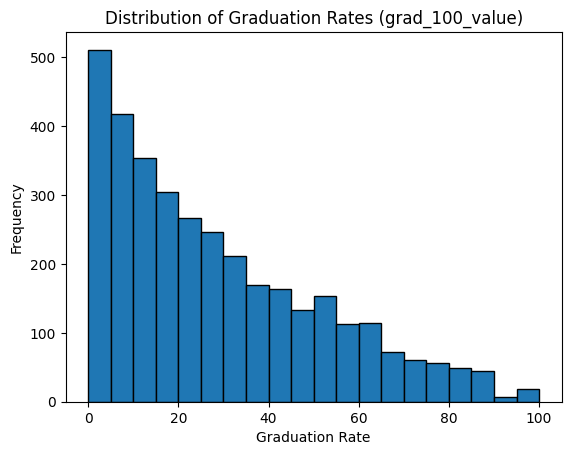

In [335]:
# create histogram
plt.hist(college['grad_100_value'], bins=20, edgecolor='black')
plt.title('Distribution of Graduation Rates (grad_100_value)')
plt.xlabel('Graduation Rate')
plt.ylabel('Frequency')
plt.show()

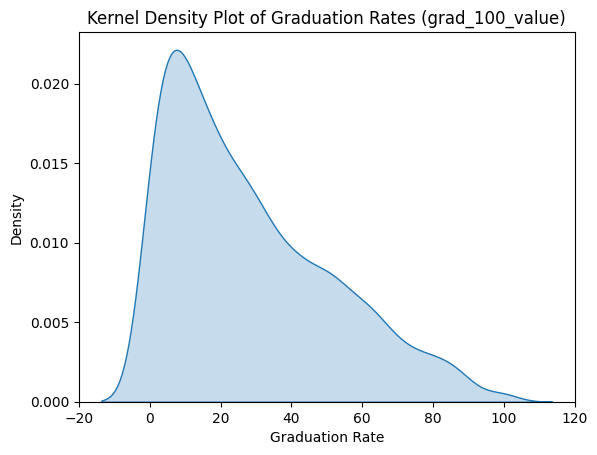

In [336]:
# create kernel density plot
sns.kdeplot(college['grad_100_value'], fill=True)
plt.title('Kernel Density Plot of Graduation Rates (grad_100_value)')
plt.xlabel('Graduation Rate')
plt.show()

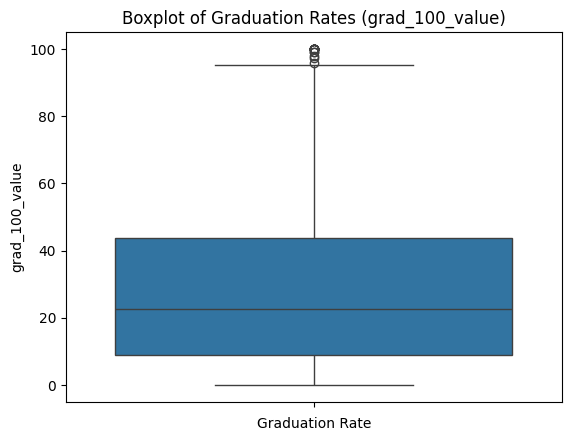

In [337]:
# create boxplot
sns.boxplot(college['grad_100_value'])
plt.title('Boxplot of Graduation Rates (grad_100_value)')
plt.xlabel('Graduation Rate')
plt.show()

In [338]:
# statistical description
print(college['grad_100_value'].describe())

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


**5. For grad_100_value, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?**

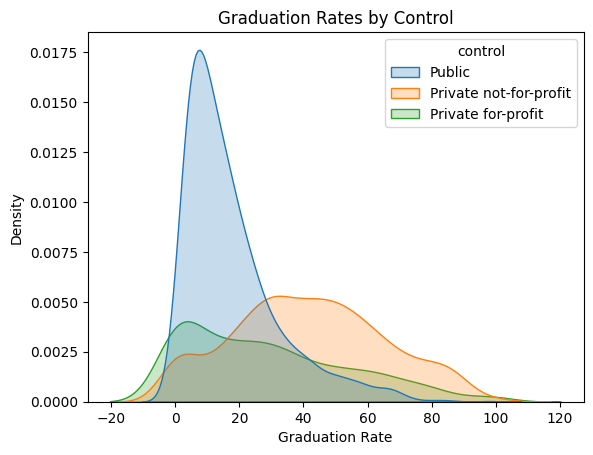

In [339]:
# kernel density plot by control
sns.kdeplot(data = college, x = "grad_100_value", hue = "control", fill = True)
plt.title('Graduation Rates by Control')
plt.xlabel('Graduation Rate')
plt.show()

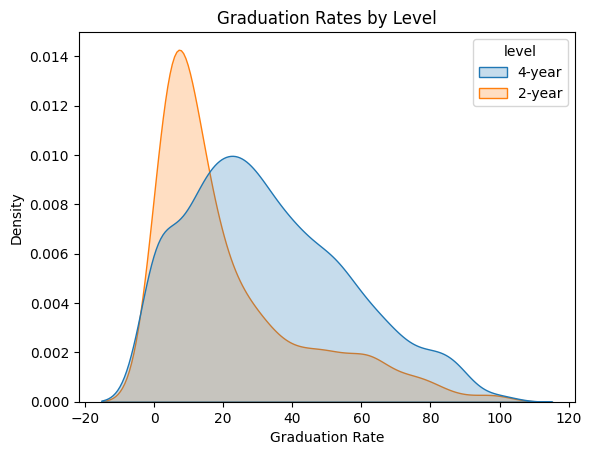

In [340]:
# kernel density plot by level
sns.kdeplot(data = college, x = "grad_100_value", hue = "level", fill = True)
plt.title('Graduation Rates by Level')
plt.xlabel('Graduation Rate')
plt.show()

**Description of what I saw:**  

The plots show that public institutions have lower graduation rates, with most of them around 20%, while private for-profit and private not-for-profit schools have a wider range of graduation rates, with many reaching higher rates. Private not-for-profit institutions tend to perform better, with a high around 50%. For 2-year schools, most have lower graduation rates concentrated around 15%, whereas 4-year schools generally have better rates, with a peak around 30%. Overall, 4-year and private not-for-profit institutions show higher graduation success compared to public and 2-year institutions.

In [341]:
# use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`

college.loc[:,['control','grad_100_value']].groupby('control').describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [342]:
college.loc[:,['level','grad_100_value']].groupby('level').describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

**Which institutions appear to have the best graduation rates?**  
The institutions with the best graduation rates appear to be private not-for-profit colleges, as they have the highest mean graduation rate at 41.66%, and a median of 41.0%. In contrast, private for-profit institutions have a mean graduation rate of 29.11% (median 24.7%), and public institutions have the lowest mean at 17.43% (median 13.2%). Additionally, 4-year institutions tend to have better graduation rates than 2-year institutions, as the mean for 4-year schools is 33.23% (median 29.7%) compared to 21.64% (median 13.0%) for 2-year schools.

**6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']`. that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?**

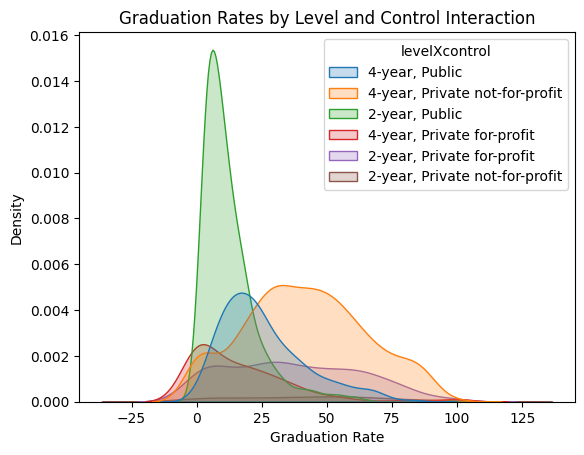

In [343]:
# create new variable
college['levelXcontrol'] = college['level'] + ', ' + college['control']

# make a grouped kernel density plot
sns.kdeplot(data = college, x = "grad_100_value", hue = "levelXcontrol", fill = True)
plt.title('Graduation Rates by Level and Control Interaction')
plt.xlabel('Graduation Rate')
plt.show()

In [344]:
college.loc[:,['level','control','grad_100_value']].groupby(['level','control']).describe()

grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200  100.0  
       Public                   5.100   9.4  16.175   97.8  
4-year Private for-profit       0.000  12.5  26.325  100.0  
       Private not-for-profit  25.000  41.0  57.800  100.0  
       Public                  13.600  21.8  33.800   86.3

**Which institutions appear to have the best graduation rates?**  
Graduation rates vary significantly across institution types. Private not-for-profit institutions consistently perform the best, with 4-year programs showing a mean graduation rate of 41.65% and a median of 41%, while 2-year programs, despite a higher median of 44.4%, are less representative due to their smaller sample size. Public institutions, especially 2-year public schools, perform the worst, with a mean graduation rate of 12.40% and a median of just 9.4%. Interestingly, private for-profit 2-year programs outperform their 4-year counterparts, with nearly double the graduation rate (37.2% vs. 17.4%),

**7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.**

<Axes: xlabel='aid_arcsinh', ylabel='Density'>

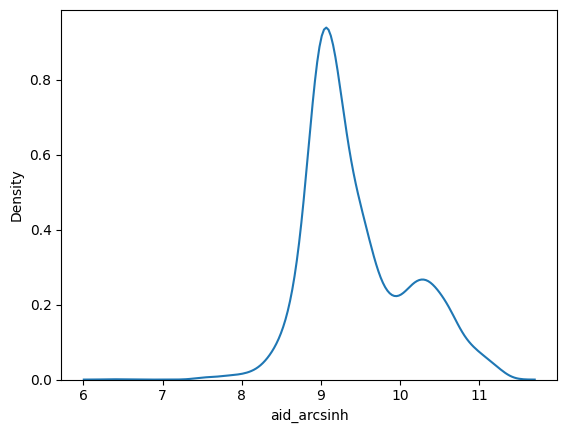

In [345]:
college['aid_arcsinh'] = np.arcsinh(college['aid_value'])
sns.kdeplot(data = college , x = 'aid_arcsinh')

/var/folders/8k/4kz648397lv0fw3qhymwqpk00000gn/T/ipykernel_75743/3132122219.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(college['aid_value'], shade=True)


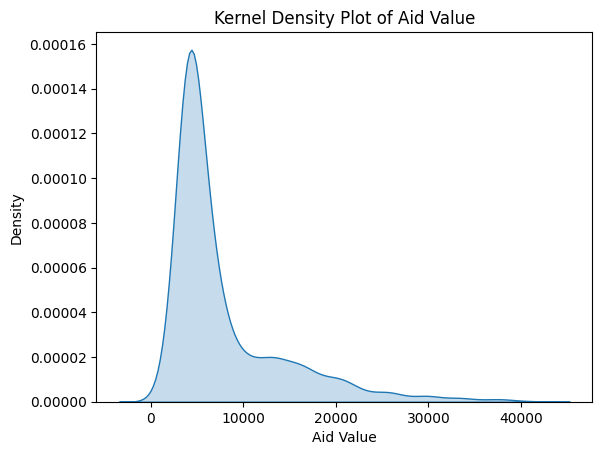

In [346]:
# kernel density plot for aid_value
sns.kdeplot(college['aid_value'], fill=True)
plt.title('Kernel Density Plot of Aid Value')
plt.xlabel('Aid Value')
plt.show()

/var/folders/8k/4kz648397lv0fw3qhymwqpk00000gn/T/ipykernel_75743/3705548896.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=college, x="aid_value", hue="level", shade=True)


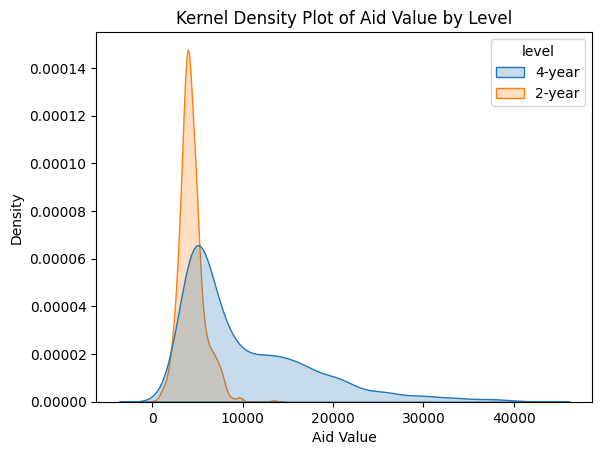

In [347]:
# kernel density plot for aid_value by level

sns.kdeplot(data=college, x="aid_value", hue="level", fill=True)
plt.title('Kernel Density Plot of Aid Value by Level')
plt.xlabel('Aid Value')
plt.show()

/var/folders/8k/4kz648397lv0fw3qhymwqpk00000gn/T/ipykernel_75743/1519969940.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=college, x="aid_value", hue="control", shade=True)


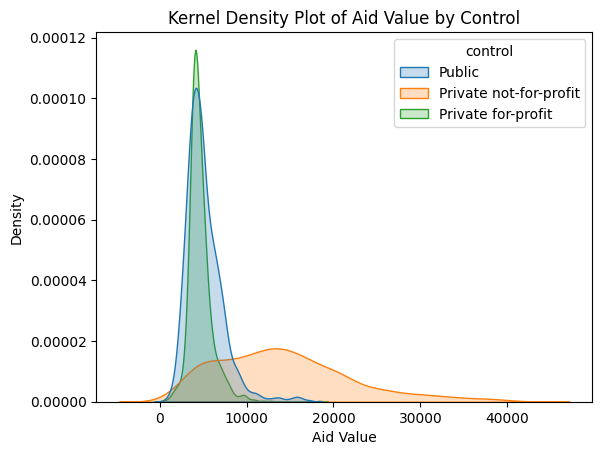

In [348]:
# kernel density plot for aid_value by control

sns.kdeplot(data=college, x="aid_value", hue="control", fill=True)
plt.title('Kernel Density Plot of Aid Value by Control')
plt.xlabel('Aid Value')
plt.show()

In [349]:
college.loc[:,['level','aid_value']].groupby('level').describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

In [350]:
college.loc[:,['control','aid_value']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

**What explains the shape of the graph?**  
The kernel density plot of `aid_value` shows a right-skewed distribution, indicating that most students receive lower amounts of financial aid, with few receiving high values. When grouped by level, 2-year institutions show lower aid distributions, with a sharper peak at lower values, while 4-year institutions display a wider range and higher mean aid values. 2-year mean was $4,310 compared to the much higher 4-year mean of $10,235. Grouping by control shows us that private not-for-profit institutions offer the highest aid, with a mean of $14,180, while public and private for-profit institutions provide lower aid amounts, with means of $5,094 and $4,632, respectively. The broader range of aid provided by 4-year and private not-for-profit institutions reflects their ability to offer more substantial financial support. Public institutions appear to have more modest aid grants. 

**8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?**

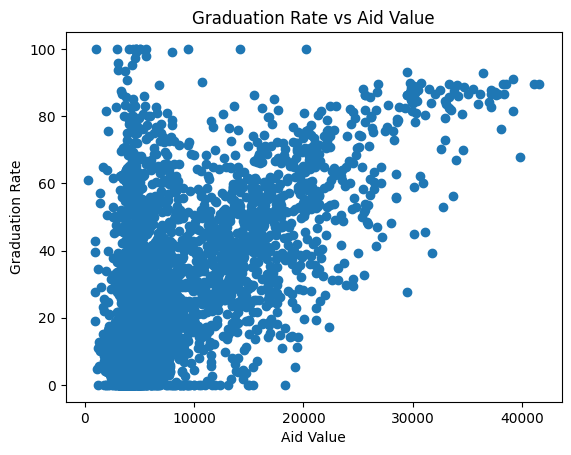

In [351]:
# scatterplot for grad_100_value by aid_value 
plt.scatter(college['aid_value'], college['grad_100_value'])
plt.title('Graduation Rate vs Aid Value')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate')
plt.show()

**Describe what you see:**  
The scatterplot of grad_100_value (graduation rate in 100% of time) versus aid_value (aid amount) shows a relatively wide spread of data points, indicating an average relationship between the two variables. However, there appear to be two distinct trends. First, for higher aid values, there seems to be a general upward trend in graduation rates, with higher aid amounts correlating with higher graduation rates. Second, for lower aid values, the graduation rates are spread across the full range from 0 to 100, but the aid values themselves remain relatively low and concentrated. This suggests that while increased aid might be associated with higher graduation outcomes, lower aid values result in more varied graduation results.

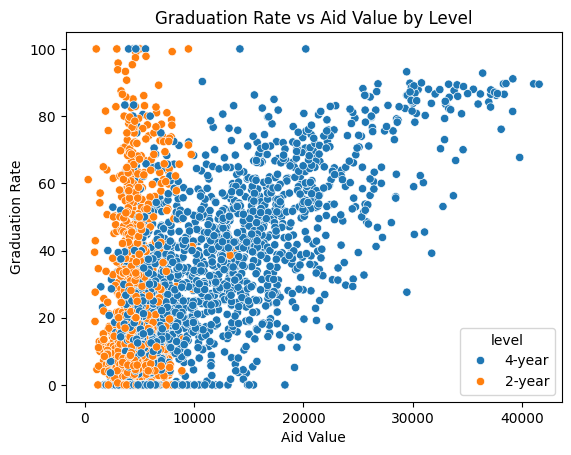

In [352]:
# scatterplot for grad_100_value by aid_value grouped by level
sns.scatterplot(data=college, x='aid_value', y='grad_100_value', hue='level')
plt.title('Graduation Rate vs Aid Value by Level')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate')
plt.show()

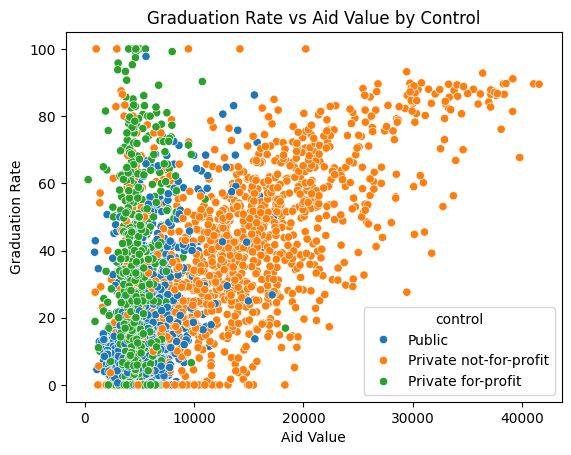

In [353]:
# scatterplot for grad_100_value by aid_value grouped by control
sns.scatterplot(data=college, x='aid_value', y='grad_100_value', hue='control')
plt.title('Graduation Rate vs Aid Value by Control')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate')
plt.show()

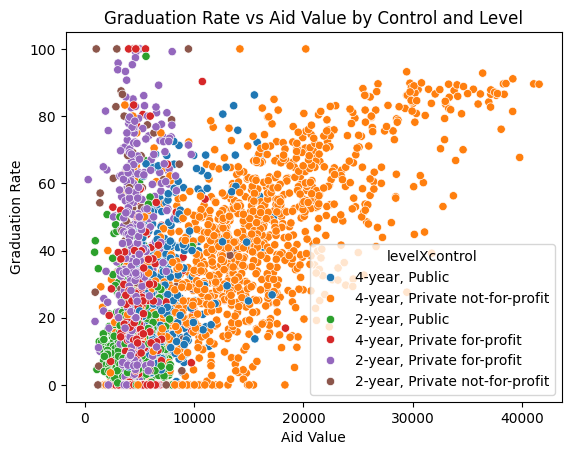

In [354]:
# scatterplot for grad_100_value by aid_value grouped by control and level
sns.scatterplot(data=college, x='aid_value', y='grad_100_value', hue='levelXcontrol')
plt.title('Graduation Rate vs Aid Value by Control and Level')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate')
plt.show()

**Describe what you see:**  
In the scatterplots of graduation rate versus aid value, we observe a general upward trend where higher aid values are often associated with higher graduation rates; however, there is still significant variability at lower aid levels. The first plot, colored by level, shows that 4-year institutions tend to have both higher aid values and higher graduation rates compared to 2-year institutions, which are clustered around lower aid values and generally lower graduation rates (although they do span the entirety from 0 to 100). The second plot, colored by control, indicates that private not-for-profit institutions are more likely to provide higher aid, which is correlated with higher graduation rates, while public and private for-profit institutions tend to offer lower aid, with a wider range of graduation rates. Finally, in the third scatterplot, graduation rates are plotted against aid values, with the data categorized by both level (2-year vs 4-year) and control (public, private not-for-profit, private for-profit). We can see that 4-year private not-for-profit institutions are almost the only type of college to be in the upper-right section of the plot, indicating higher aid values and higher graduation rates. On the contrary, 2-year public and private for-profit institutions tend to cluster around lower aid values and lower graduation rates. 4-year public institutions and 4-year private for-profit institutions show more spread but generally lower aid amounts compared to private not-for-profit institutions.

**For which kinds of institutions does aid seem to increase graduation rates?**
Aid appears to increase graduation rates most significantly for 4-year private not-for-profit institutions, as seen by the concentration of points with higher aid values and higher graduation rates in these categories. Public and private for-profit institutions do not show as strong of a correlation between aid and graduation rates, especially at the lower aid levels where the range of graduation outcomes remains quite broad.

# Question 4  
Go to `https://data.cms.gov/search`.  

**1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: `https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data`**  

For this question, I chose the dataset: "**Medicare Current Beneficiary Survey**".

**2. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.**  

The data dictionary provides a clear and detailed description of how missing data is handled, particularly for categorical variables. For instance, variables like `ADM_H_MEDSTA` (Medicare Status) provide labels such as 1: Aged, 2: Disabled, and 3: Unknown, with a specific code (3) indicating missing or unknown data. This documentation makes it easier to distinguish between valid categories and missing or inapplicable entries. These are well-documented, making it straightforward to understand the categorical breakdowns. For numeric variables, the situation is a bit more complex. Many variables that could be considered numeric are actually formatted and treated as categorical variables. For example, `PHYVIST` (Total Office Visits in the Current Year) is presented in categories such as 0: No Office Visit, 1: 1 to 5 office visits, 2: 6 to 10 office visits, 3: 11 to 15 office visits, 4: 16 to 20 office visits, 5: 21 or more office visits. While this categorization is useful for summarizing the data in predefined ranges, it limits the numeric precision of the variable. True numeric variables like continuous counts or monetary values are rarely present, and even when they are, they're often grouped into predefined intervals or categories. In terms of missing data, the dictionary uses clear codes such as `'.'` for inapplicable or missing values. Overall, the data dictionary explains the categorical variables well, making it easy to understand the options. However, for variables that could be treated as numbers, the way they are grouped into categories limits detailed analysis. While missing values are mostly clear, the use of symbols like . without more explanation could be made more consistent across all variables.

**3. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.**  

**Variables Picked:**  
`DEM_AGE`: Categorical variable with age ranges.      
`DEM_SEX`: Categorical variable with values indicating male or female.    
`DEM_RACE`: Categorical variable with values for race/ethnicity group.  
`HLT_OCBETES`: Categorical variable indicating whether the respondent has been diagnosed with diabetes.  
`ACC_MCQUALTY`: Satisfaction with medical care quality, categorical variable with levels from very satisfied to very dissatisfied.  
`HLT_BMI_CAT`: Categorical variable representing different BMI categories.  
  
Together, these variables give us a well-rounded view of the demographic and health landscape. We can explore how health outcomes like diabetes and BMI are influenced by demographic factors such as age, gender, and race. Moreover, analyzing how satisfaction with healthcare quality interacts with these variables will provide insights into whether certain groups feel they are receiving adequate care based on their health status and demographic background. This combination allows us to explore potential health disparities and the relationships between demographics, health conditions, and perceptions of healthcare.

In [355]:
# imports 
import requests
import urllib.request
import streamlit as st
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/kweuj7fh/DS3001-EDA-and-Visualization/refs/heads/main/sfpuf2021_1_fall.csv' # url of data
data = pd.read_csv(url, low_memory=False) # read csv from url
print(data.shape, '\n') # find number of rows and cols
data.head() # display first few rows of dataframe

(12783, 337) 



,PUF_ID,SURVEYYR,VERSION,ADM_H_MEDSTA,ADM_H_GHPSW,ADM_H_PDRS,ADM_OP_MDCD,ADM_DUAL_FLAG_YR,ADM_FFS_FLAG_YR,ADM_MA_FLAG_YR,...,PUFF091,PUFF092,PUFF093,PUFF094,PUFF095,PUFF096,PUFF097,PUFF098,PUFF099,PUFF100
0,21000003,2021,1,1,2,1.0,1,1,3,1,...,988.252590,5273.441518,1095.075758,1245.906455,6049.581125,994.556718,5490.385215,1264.822658,5632.555206,989.464837
1,21000004,2021,1,1,2,1.0,1,1,3,1,...,22599.768459,3574.297077,2905.632202,3011.695926,4283.873099,18154.868227,16722.373362,15553.879545,14193.033902,18737.870831
2,21000005,2021,1,1,2,1.0,1,1,3,1,...,3998.371708,3748.552103,574.146156,4082.909199,559.108837,571.423027,3550.951071,4554.459435,605.491265,612.180490
3,21000011,2021,1,1,2,1.0,1,1,3,1,...,5679.361042,982.382754,1046.200903,1103.813758,1085.475033,1231.049575,1157.845607,720.394183,1134.894480,778.578574
4,21000012,2021,1,1,1,1.0,2,3,1,3,...,12188.282713,14418.230488,10457.419141,2761.012141,2160.504248,2346.820214,2230.871858,17188.553558,12597.595445,13900.497117


In [356]:
# for the first step of cleaning, I wanted to only show the categories/variables I would be using

variables = ['DEM_AGE', 'DEM_SEX', 'DEM_RACE', 'HLT_OCBETES', 'ACC_MCQUALTY', 'HLT_BMI_CAT']
mydata = data[variables]
print(mydata.shape, '\n') # find number of rows and cols
mydata.head() # display first few rows of dataframe

(12783, 6) 



,DEM_AGE,DEM_SEX,DEM_RACE,HLT_OCBETES,ACC_MCQUALTY,HLT_BMI_CAT
0,3,2,1,2,1,1.0
1,2,1,2,1,1,2.0
2,3,2,1,2,1,2.0
3,3,2,1,2,2,1.0
4,2,2,3,1,2,2.0


In [357]:
# for the second part, I wanted to find out how many null values for each category, as well as the unique values

print(mydata['DEM_AGE'].isnull().sum())
print(mydata['DEM_SEX'].isnull().sum())
print(mydata['DEM_RACE'].isnull().sum())
print(mydata['HLT_OCBETES'].isnull().sum())
print(mydata['ACC_MCQUALTY'].isnull().sum())
print(mydata['HLT_BMI_CAT'].isnull().sum())

print(mydata['DEM_AGE'].unique())
print(mydata['DEM_SEX'].unique())
print(mydata['DEM_RACE'].unique())
print(mydata['HLT_OCBETES'].unique())
print(mydata['ACC_MCQUALTY'].unique())
print(mydata['HLT_BMI_CAT'].unique())

0
0
0
12
9
274
[3 2 1]
[2 1]
[1 2 3 4]
['2' '1' 'R' 'D' nan]
['1' '2' '3' '5' '4' 'D' 'R' nan]
[ 1.  2.  3. nan]


In [358]:
# for the third part of my cleanup, I mapped the values in the dataset to descriptive labels,
# for example, 1 becomes Male and 2 becomes Female for `DEM_SEX`
# i also replaced placeholders like '.', 'D', and 'R' with NaN to handle missing or invalid data. 
# this step ensures clarity in my analysis, making the data easier to interpret while maintaining consistency across all variables.

ages = {
    1: 'Age <65 years',
    2: 'Age 65-74 years',
    3: 'Age 75+ years'
}

sexes = {
    1: 'Male',
    2: 'Female'
}

races = {
    1: 'Non-Hispanic white',
    2: 'Non-Hispanic black',
    3: 'Hispanic',
    4: 'Other'
}

diabetes = {
    '1': 'Yes',
    '2': 'No',
    'D': np.nan, # "Don't know"
    'R': np.nan, # 'Refused'
    '.': np.nan # 'Inapplicable/Missing'
}

satisfaction = {
    '1': 'Very Satisfied',
    '2': 'Satisfied',
    '3': 'Dissatisfied',
    '4': 'Very Dissatisfied',
    '5': 'No experience',
    'D': np.nan, #"Don't know"
    'R': np.nan, #'Refused'
    '.': np.nan #'Inapplicable/Missing'
}

bmi = {
    1: 'Underweight/healthy, <25',
    2: 'Overweight, 25-<30',
    3: 'Obese/high-risk obese, >=30',
    '.': np.nan # 'Inapplicable/Missing'
}


mydata.loc[:, 'DEM_AGE'] = mydata['DEM_AGE'].replace(ages)
mydata.loc[:, 'DEM_SEX'] = mydata['DEM_SEX'].replace(sexes)
mydata.loc[:, 'DEM_RACE'] = mydata['DEM_RACE'].replace(races)
mydata.loc[:, 'HLT_OCBETES'] = mydata['HLT_OCBETES'].replace(diabetes)
mydata.loc[:, 'ACC_MCQUALTY'] = mydata['ACC_MCQUALTY'].replace(satisfaction)
mydata.loc[:, 'HLT_BMI_CAT'] = mydata['HLT_BMI_CAT'].replace(bmi)

mydata.loc[:, 'DEM_AGE'] = mydata['DEM_AGE'].astype('object')
mydata.loc[:, 'DEM_SEX'] = mydata['DEM_SEX'].astype('object')
mydata.loc[:, 'DEM_RACE'] = mydata['DEM_RACE'].astype('object')
mydata.loc[:, 'HLT_OCBETES'] = mydata['HLT_OCBETES'].astype('object')
mydata.loc[:, 'ACC_MCQUALTY'] = mydata['ACC_MCQUALTY'].astype('object')
mydata.loc[:, 'HLT_BMI_CAT'] = mydata['HLT_BMI_CAT'].astype('object')


mydata.head()

/var/folders/8k/4kz648397lv0fw3qhymwqpk00000gn/T/ipykernel_75743/4093501248.py:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Age 75+ years' 'Age 65-74 years' 'Age 75+ years' ... 'Age 65-74 years'
 'Age <65 years' 'Age 75+ years']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mydata.loc[:, 'DEM_AGE'] = mydata['DEM_AGE'].replace(ages)
/var/folders/8k/4kz648397lv0fw3qhymwqpk00000gn/T/ipykernel_75743/4093501248.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Female' 'Male' 'Female' ... 'Female' 'Male' 'Female']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mydata.loc[:, 'DEM_SEX'] = mydata['DEM_SEX'].replace(sexes)
/var/folders/8k/4kz648397lv0fw3qhymwqpk00000gn/T/ipykernel_75743/4093501248.py:53: FutureWarning: Setting an item of incompatible dtype 

,DEM_AGE,DEM_SEX,DEM_RACE,HLT_OCBETES,ACC_MCQUALTY,HLT_BMI_CAT
0,Age 75+ years,Female,Non-Hispanic white,No,Very Satisfied,"Underweight/healthy, <25"
1,Age 65-74 years,Male,Non-Hispanic black,Yes,Very Satisfied,"Overweight, 25-<30"
2,Age 75+ years,Female,Non-Hispanic white,No,Very Satisfied,"Overweight, 25-<30"
3,Age 75+ years,Female,Non-Hispanic white,No,Satisfied,"Underweight/healthy, <25"
4,Age 65-74 years,Female,Hispanic,Yes,Satisfied,"Overweight, 25-<30"


In [359]:
# for the fourth part, I wanted to double check after the mapping how many null values for each category, as well as the unique values

print(mydata['DEM_AGE'].isnull().sum())
print(mydata['DEM_SEX'].isnull().sum())
print(mydata['DEM_RACE'].isnull().sum())
print(mydata['HLT_OCBETES'].isnull().sum())
print(mydata['ACC_MCQUALTY'].isnull().sum())
print(mydata['HLT_BMI_CAT'].isnull().sum())

print(mydata['DEM_AGE'].unique())
print(mydata['DEM_SEX'].unique())
print(mydata['DEM_RACE'].unique())
print(mydata['HLT_OCBETES'].unique())
print(mydata['ACC_MCQUALTY'].unique())
print(mydata['HLT_BMI_CAT'].unique())

0
0
0
45
49
274
['Age 75+ years' 'Age 65-74 years' 'Age <65 years']
['Female' 'Male']
['Non-Hispanic white' 'Non-Hispanic black' 'Hispanic' 'Other']
['No' 'Yes' nan]
['Very Satisfied' 'Satisfied' 'Dissatisfied' 'No experience'
 'Very Dissatisfied' nan]
['Underweight/healthy, <25' 'Overweight, 25-<30'
 'Obese/high-risk obese, >=30' nan]


**4. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?**

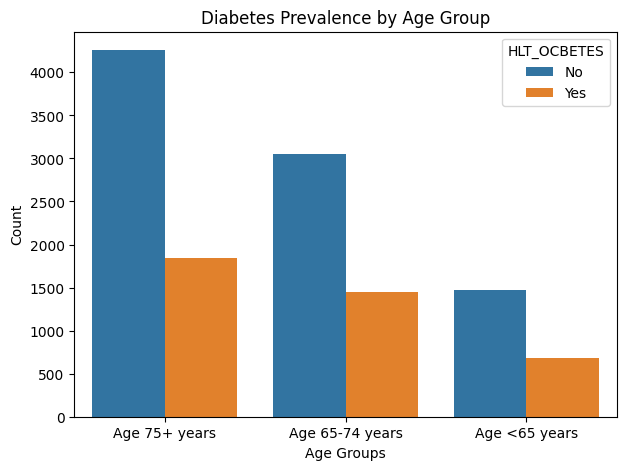

In [360]:
# bar plot for diabetes prevalence by age

plt.figure(figsize=(7,5))
sns.countplot(x='DEM_AGE', hue='HLT_OCBETES', data=mydata)
plt.title('Diabetes Prevalence by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

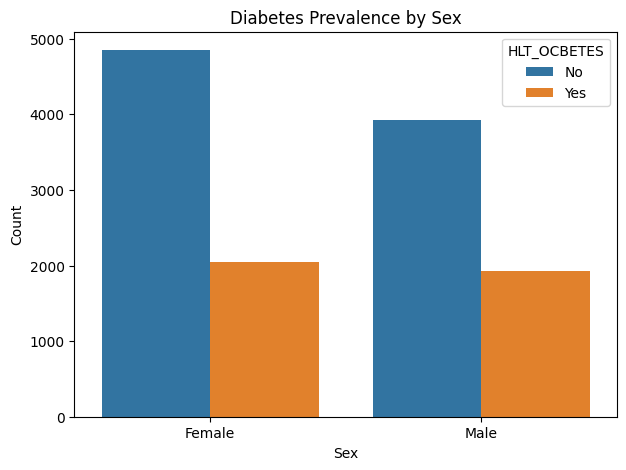

In [361]:
# bar plot for diabetes prevalence by sex

plt.figure(figsize=(7,5))
sns.countplot(x='DEM_SEX', hue='HLT_OCBETES', data=mydata)
plt.title('Diabetes Prevalence by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

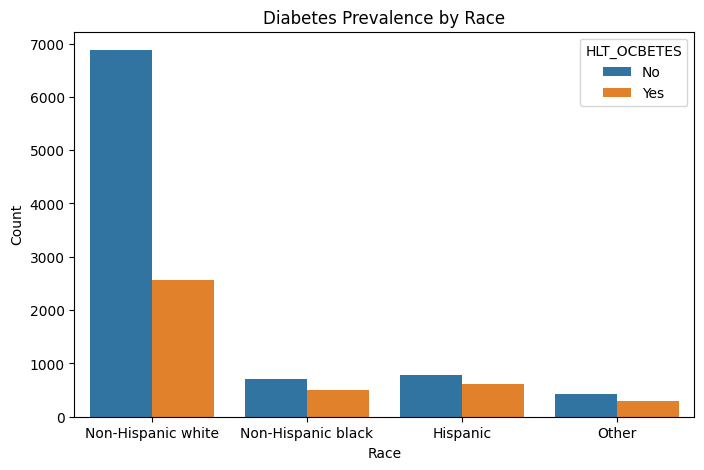

In [362]:
# bar plot for diabetes prevalence by race

plt.figure(figsize=(8,5))
sns.countplot(x='DEM_RACE', hue='HLT_OCBETES', data=mydata)
plt.title('Diabetes Prevalence by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

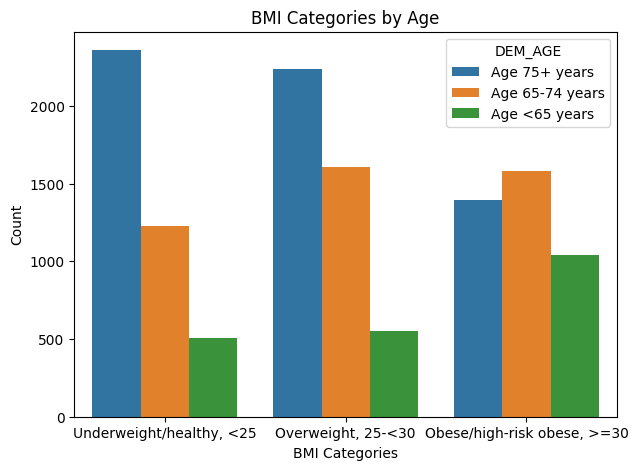

In [363]:
# bar plot for bmi by age

plt.figure(figsize=(7,5))
sns.countplot(x='HLT_BMI_CAT', hue='DEM_AGE', data=mydata)
plt.title('BMI Categories by Age')
plt.xlabel('BMI Categories')
plt.ylabel('Count')
plt.show()

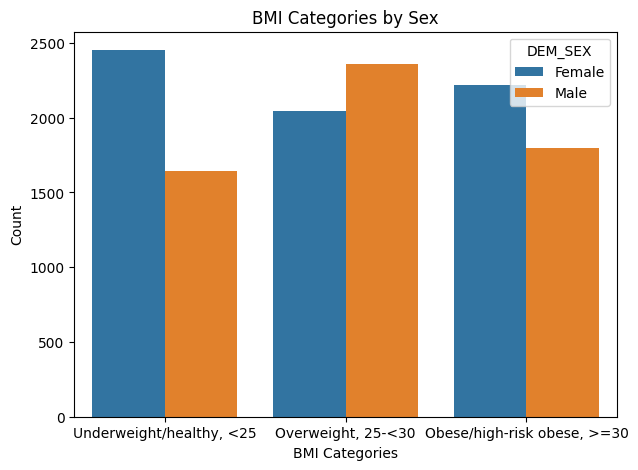

In [364]:
# bar plot for bmi by sex

plt.figure(figsize=(7,5))
sns.countplot(x='HLT_BMI_CAT', hue='DEM_SEX', data=mydata)
plt.title('BMI Categories by Sex')
plt.xlabel('BMI Categories')
plt.ylabel('Count')
plt.show()

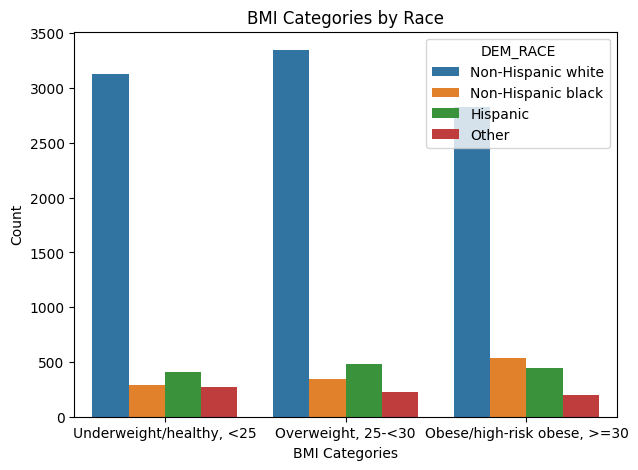

In [365]:
# bar plot for bmi by race

plt.figure(figsize=(7,5))
sns.countplot(x='HLT_BMI_CAT', hue='DEM_RACE', data=mydata)
plt.title('BMI Categories by Race')
plt.xlabel('BMI Categories')
plt.ylabel('Count')
plt.show()

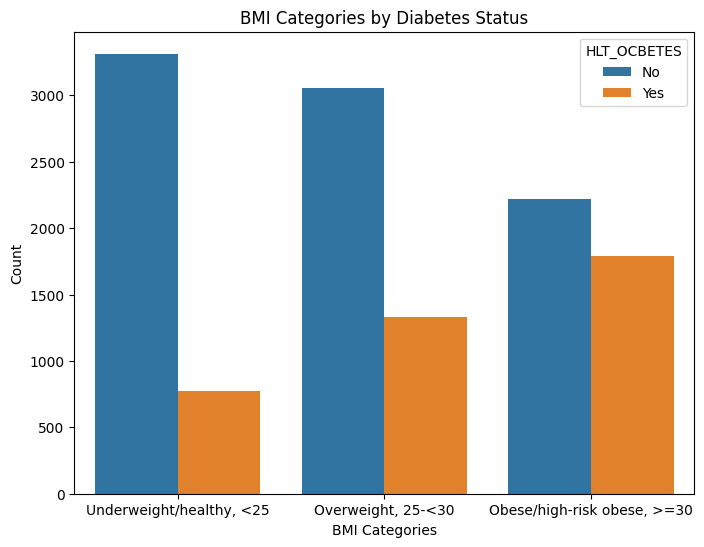

In [366]:
# bar plot for bmi by diabetes status

plt.figure(figsize=(8,6))
sns.countplot(x='HLT_BMI_CAT', hue='HLT_OCBETES', data=mydata)
plt.title('BMI Categories by Diabetes Status')
plt.xlabel('BMI Categories')
plt.ylabel('Count')
plt.show()

From the bar plots, there do not appear to be any significant outliers in the dataset for the variables examined. The distributions across sex, race, and age groups for diabetes prevalence and BMI categories seem to follow expected patterns, with no extreme values that deviate unusually from the rest of the data. 

**5. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?**

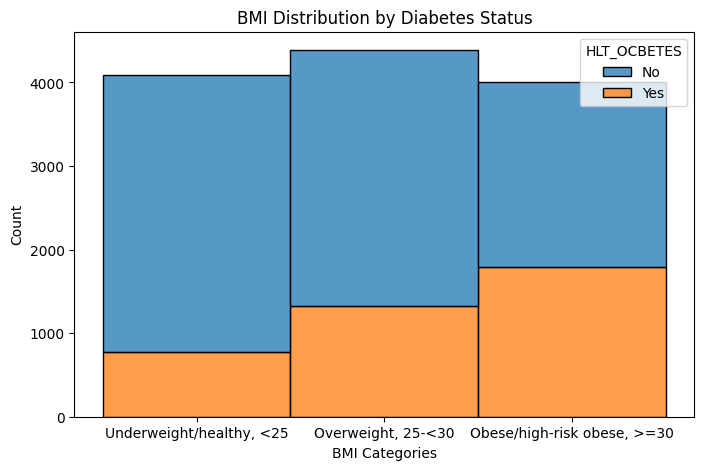

In [367]:
# histogram for bmi distribution by diabetes status
plt.figure(figsize=(8,5))
sns.histplot(data=mydata, x='HLT_BMI_CAT', hue='HLT_OCBETES', multiple='stack', kde=False)
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('BMI Categories')
plt.ylabel('Count')
plt.show()

In the first histogram showing BMI Distribution by Diabetes Status, we see that as BMI increases, the proportion of individuals with diabetes also increases, particularly in the obese/high-risk obese category (BMI >= 30). The underweight/healthy category (BMI < 25) has the lowest proportion of individuals with diabetes, while the overweight category (BMI 25-<30) is somewhat balanced between those with and without diabetes. This pattern suggests a clear correlation between higher BMI and diabetes prevalence.

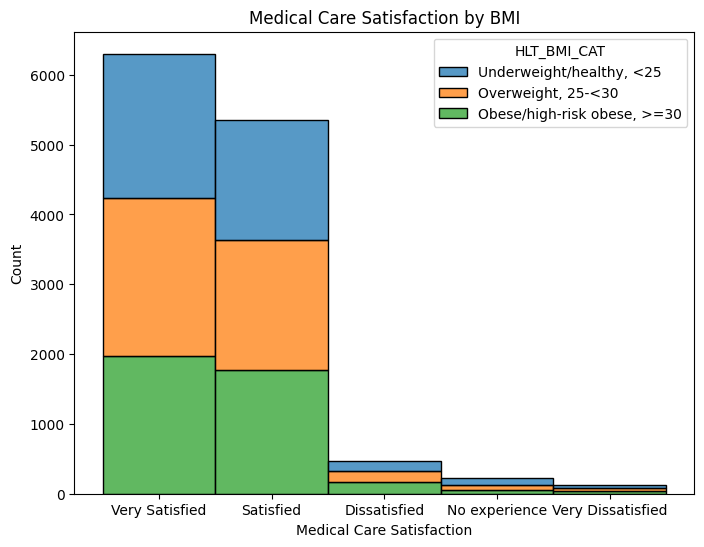

In [368]:
# histogram for satisfaction with medical care by bmi
plt.figure(figsize=(8,6))
sns.histplot(data=mydata, x='ACC_MCQUALTY', hue='HLT_BMI_CAT', multiple='stack', kde=False)
plt.title('Medical Care Satisfaction by BMI')
plt.xlabel('Medical Care Satisfaction')
plt.ylabel('Count')
plt.show()

In the second histogram, which shows Medical Care Satisfaction by BMI, we see that most individuals, regardless of their BMI category, are either "Very Satisfied" or "Satisfied" with their medical care. There is a noticeable increase in satisfaction levels as BMI decreases. However, the obese/high-risk obese group still shows quite a high count of individuals in both the "Very Satisfied" and "Satisfied" categories, which may indicate that BMI does not strongly affect overall satisfaction with medical care. Dissatisfaction and "No experience" categories have very few participants across all BMI groups.

The distributions are already grouped by categories, so no transformations are needed. Since the data is categorical, there's no need to rescale it. The variables are clearly shown in their BMI and satisfaction groups, and further scaling wouldn’t improve the analysis.

**6. Create a scatter plot, and describe the relationship you see.**

In [369]:
# for this part i had to recode the  variables so they are "numerical" again

age_numerical = {
    'Age <65 years': 1,
    'Age 65-74 years': 2,
    'Age 75+ years': 3
}

sex_numerical = {
    'Male': 1,
    'Female': 2
}

race_numerical = {
    'Non-Hispanic white': 1,
    'Non-Hispanic black': 2,
    'Hispanic': 3,
    'Other': 4
}

diabetes_numerical = {
    'Yes': 1,
    'No': 2
}

bmi_numerical = {
    'Underweight/healthy, <25': 1,
    'Overweight, 25-<30': 2,
    'Obese/high-risk obese, >=30': 3
}

satisfaction_numerical = {
    'Very Satisfied': 1,
    'Satisfied': 2,
    'Dissatisfied': 3,
    'Very Dissatisfied': 4,
    'No experience': 5
}

mydata.loc[:, 'DEM_AGE'] = mydata['DEM_AGE'].replace(age_numerical)
mydata.loc[:, 'DEM_SEX'] = mydata['DEM_SEX'].replace(sex_numerical)
mydata.loc[:, 'DEM_RACE'] = mydata['DEM_RACE'].replace(race_numerical)
mydata.loc[:, 'HLT_OCBETES'] = mydata['HLT_OCBETES'].replace(diabetes_numerical)
mydata.loc[:, 'ACC_MCQUALTY'] = mydata['ACC_MCQUALTY'].replace(satisfaction_numerical)
mydata.loc[:, 'HLT_BMI_CAT'] = mydata['HLT_BMI_CAT'].replace(bmi_numerical)

print(mydata['DEM_AGE'].unique())
print(mydata['DEM_SEX'].unique())
print(mydata['DEM_RACE'].unique())
print(mydata['HLT_OCBETES'].unique())
print(mydata['ACC_MCQUALTY'].unique())
print(mydata['HLT_BMI_CAT'].unique())

mydata.head()


[3 2 1]
[2 1]
[1 2 3 4]
[2.0 1.0 nan]
[1.0 2.0 3.0 5.0 4.0 nan]
[1.0 2.0 3.0 nan]


/var/folders/8k/4kz648397lv0fw3qhymwqpk00000gn/T/ipykernel_75743/3238527692.py:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mydata.loc[:, 'DEM_AGE'] = mydata['DEM_AGE'].replace(age_numerical)
/var/folders/8k/4kz648397lv0fw3qhymwqpk00000gn/T/ipykernel_75743/3238527692.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mydata.loc[:, 'DEM_SEX'] = mydata['DEM_SEX'].replace(sex_numerical)
/var/folders/8k/4kz648397lv0fw3qhymwqpk00000gn/T/ipykernel_75743/3238527692.py:42: FutureWarning: Downcasting behavior in `replace` is depreca

,DEM_AGE,DEM_SEX,DEM_RACE,HLT_OCBETES,ACC_MCQUALTY,HLT_BMI_CAT
0,3,2,1,2.0,1.0,1.0
1,2,1,2,1.0,1.0,2.0
2,3,2,1,2.0,1.0,2.0
3,3,2,1,2.0,2.0,1.0
4,2,2,3,1.0,2.0,2.0


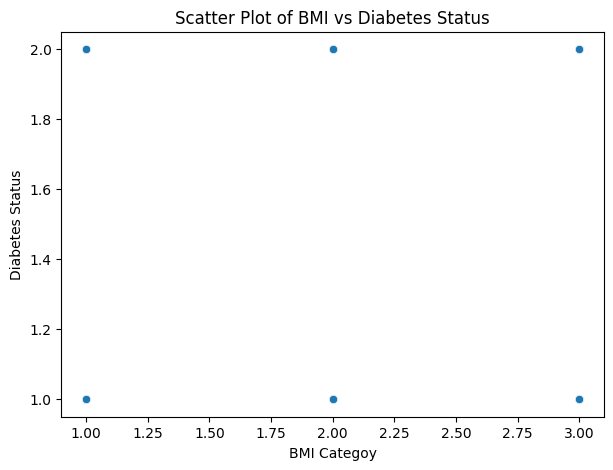

In [370]:
# scatter plot for bmi vs diabetes status
plt.figure(figsize=(7,5))
sns.scatterplot(x='HLT_BMI_CAT', y='HLT_OCBETES', data=mydata)
plt.title('Scatter Plot of BMI vs Diabetes Status')
plt.xlabel('BMI Categoy')
plt.ylabel('Diabetes Status')
plt.show()

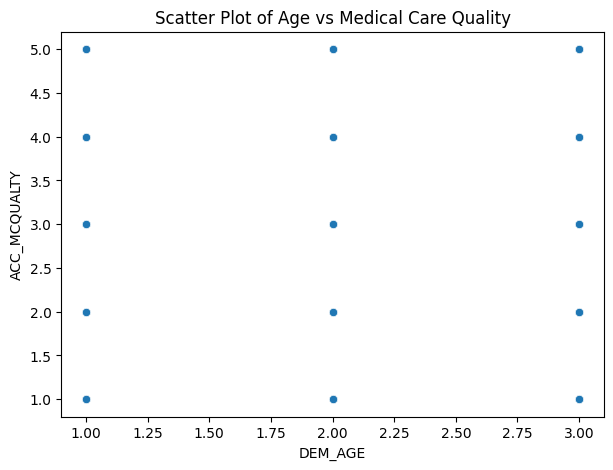

In [371]:
# scatter plot for age vs medical care quality
plt.figure(figsize=(7,5))
sns.scatterplot(x='DEM_AGE', y='ACC_MCQUALTY', data=mydata)
plt.title('Scatter Plot of Age vs Medical Care Quality')
plt.show()

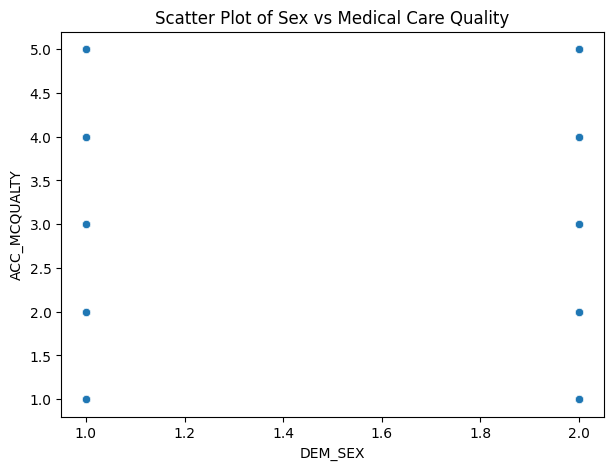

In [372]:
# scatter plot for sex vs medical care quality
plt.figure(figsize=(7,5))
sns.scatterplot(x='DEM_SEX', y='ACC_MCQUALTY', data=mydata)
plt.title('Scatter Plot of Sex vs Medical Care Quality')
plt.show()

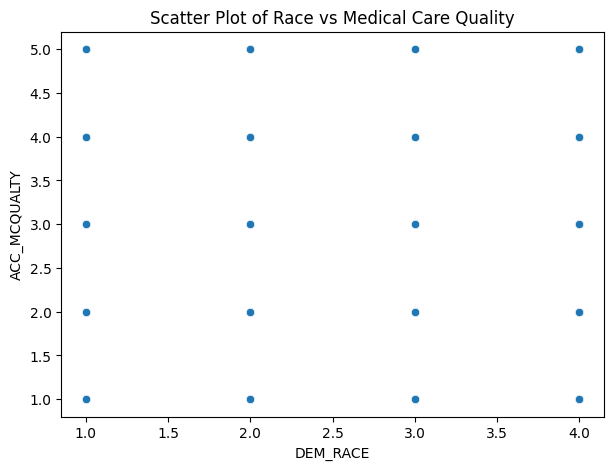

In [373]:
# scatter plot for race vs medical care quality
plt.figure(figsize=(7,5))
sns.scatterplot(x='DEM_RACE', y='ACC_MCQUALTY', data=mydata)
plt.title('Scatter Plot of Race vs Medical Care Quality')
plt.show()

The data in this analysis is largely categorical, which makes it challenging to effectively use scatter plots. Scatter plots are typically used to show relationships between continuous variables, but since the variables here represent distinct categories like age groups, BMI categories, and satisfaction levels, the plots don't provide meaningful insights or clear trends. Although I attempted to convert the data into numerical form, this approach didn’t work as effectively as I had hoped, as seen in the scatter plots above. In the future, using datasets with continuous numerical variables would allow for a more accurate and useful application of scatter plots. This would help identify potential correlations and trends that are harder to detect with categorical data.

**7. Create a table (cross tabulation, variance-covariance, or a .describe() five-number summary), and explain what you see.**

In [374]:
ages = {
    1: 'Age <65 years',
    2: 'Age 65-74 years',
    3: 'Age 75+ years'
}

sexes = {
    1: 'Male',
    2: 'Female'
}

races = {
    1: 'Non-Hispanic white',
    2: 'Non-Hispanic black',
    3: 'Hispanic',
    4: 'Other'
}

diabetes = {
    1.0: 'Yes',
    2.0: 'No',
    'D': np.nan, # "Don't know"
    'R': np.nan, # 'Refused'
    '.': np.nan # 'Inapplicable/Missing'
}

satisfaction = {
    1.0: 'Very Satisfied',
    2.0: 'Satisfied',
    3.0: 'Dissatisfied',
    4.0: 'Very Dissatisfied',
    5.0: 'No experience',
    'D': np.nan, #"Don't know"
    'R': np.nan, #'Refused'
    '.': np.nan #'Inapplicable/Missing'
}

bmi = {
    1: 'Underweight/healthy, <25',
    2: 'Overweight, 25-<30',
    3: 'Obese/high-risk obese, >=30',
    '.': np.nan # 'Inapplicable/Missing'
}


mydata.loc[:, 'DEM_AGE'] = mydata['DEM_AGE'].replace(ages)
mydata.loc[:, 'DEM_SEX'] = mydata['DEM_SEX'].replace(sexes)
mydata.loc[:, 'DEM_RACE'] = mydata['DEM_RACE'].replace(races)
mydata.loc[:, 'HLT_OCBETES'] = mydata['HLT_OCBETES'].replace(diabetes)
mydata.loc[:, 'ACC_MCQUALTY'] = mydata['ACC_MCQUALTY'].replace(satisfaction)
mydata.loc[:, 'HLT_BMI_CAT'] = mydata['HLT_BMI_CAT'].replace(bmi)

mydata.loc[:, 'DEM_AGE'] = mydata['DEM_AGE'].astype('object')
mydata.loc[:, 'DEM_SEX'] = mydata['DEM_SEX'].astype('object')
mydata.loc[:, 'DEM_RACE'] = mydata['DEM_RACE'].astype('object')
mydata.loc[:, 'HLT_OCBETES'] = mydata['HLT_OCBETES'].astype('object')
mydata.loc[:, 'ACC_MCQUALTY'] = mydata['ACC_MCQUALTY'].astype('object')
mydata.loc[:, 'HLT_BMI_CAT'] = mydata['HLT_BMI_CAT'].astype('object')


mydata.head()

,DEM_AGE,DEM_SEX,DEM_RACE,HLT_OCBETES,ACC_MCQUALTY,HLT_BMI_CAT
0,Age 75+ years,Female,Non-Hispanic white,No,Very Satisfied,"Underweight/healthy, <25"
1,Age 65-74 years,Male,Non-Hispanic black,Yes,Very Satisfied,"Overweight, 25-<30"
2,Age 75+ years,Female,Non-Hispanic white,No,Very Satisfied,"Overweight, 25-<30"
3,Age 75+ years,Female,Non-Hispanic white,No,Satisfied,"Underweight/healthy, <25"
4,Age 65-74 years,Female,Hispanic,Yes,Satisfied,"Overweight, 25-<30"


In [375]:
cross_tab = pd.crosstab(mydata['DEM_RACE'], mydata['HLT_OCBETES'], margins=True)
cross_tab

HLT_OCBETES,No,Yes,All
DEM_RACE,,,
Hispanic,781,609,1390
Non-Hispanic black,699,506,1205
Non-Hispanic white,6878,2559,9437
Other,417,289,706
All,8775,3963,12738


In [376]:
cross_tab_percentage = pd.crosstab(mydata['DEM_RACE'], mydata['HLT_OCBETES'], margins=True, normalize='index') * 100
cross_tab_percentage

HLT_OCBETES,No,Yes
DEM_RACE,,
Hispanic,56.187050,43.812950
Non-Hispanic black,58.008299,41.991701
Non-Hispanic white,72.883332,27.116668
Other,59.065156,40.934844
All,68.888366,31.111634


The cross-tabulation reveals significant disparities in diabetes prevalence across racial groups. Non-Hispanic white individuals have the lowest rate of diabetes, with only 27.1% affected, while Hispanic and Non-Hispanic black groups have much higher rates, at 43.8% and 42.0%, respectively. The "Other" racial category also shows a relatively high diabetes prevalence of 40.9%. This data suggests that certain racial groups, particularly Hispanic and Non-Hispanic black populations, are more vulnerable to diabetes. These differences highlight important health disparities that could be linked to various factors such as socioeconomic status and healthcare access.